# Import Python Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Import two data set 
### 1. Customer Details as cust and 
### 2. Card Details as card

In [49]:
cust = pd.read_csv("C:\Technology\\HeroVired\\Capston\\Customer Details.csv", encoding='ISO-8859-1')

card = pd.read_csv(r"C:\Technology\\HeroVired\\Capston\\Card Details.csv", encoding='ISO-8859-1')

### Joining two datasets as data. Since both the datasets have distinct columns except CustomerID
### Here Concat funtion keys are not used since, both the datasets have same order and number of CustomerIDs

In [50]:
data = pd.concat([cust,card[['Income','Limit','Rating','Cards','Balance']]], axis=1)
data

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


In [7]:
# Categorical data as cat_data
cat_data = data.select_dtypes(include=['object']).columns.tolist()
cat_data

['Name', 'CustomerID', 'Marital Status', 'Gender', 'Ethnicity', 'Education']

In [8]:
# Numerical data as num_data
num_data = data.select_dtypes(include=np.number).columns.tolist()
num_data

['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance']

### EDA Univariate Analysis
<br>In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.
<br>All the variables "Age, Income, Limit, Rating, Cards and Balance" are positively skewed distribution.

Age
Skew : 0.04


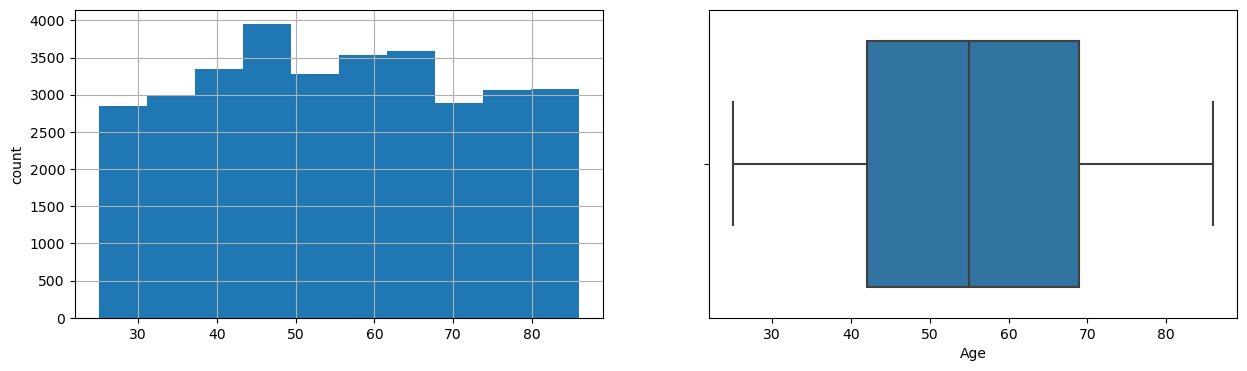

Income
Skew : 1.55


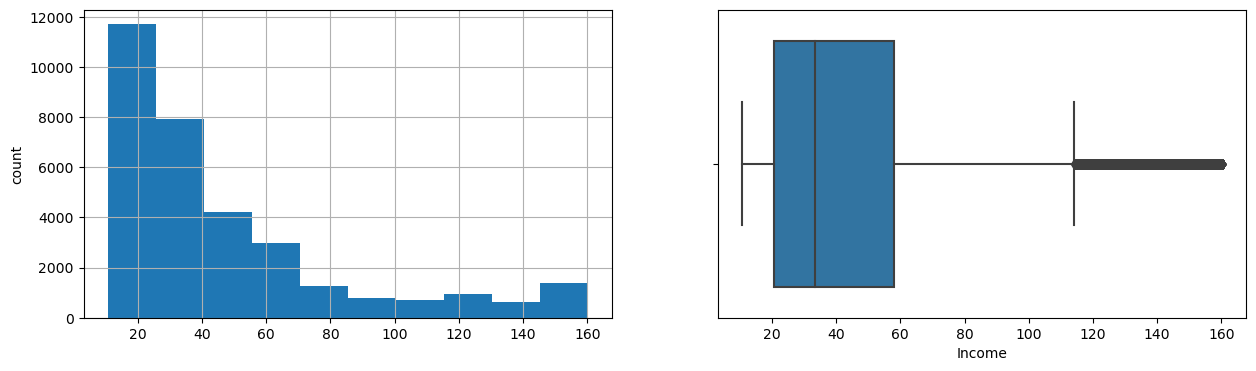

Limit
Skew : 0.76


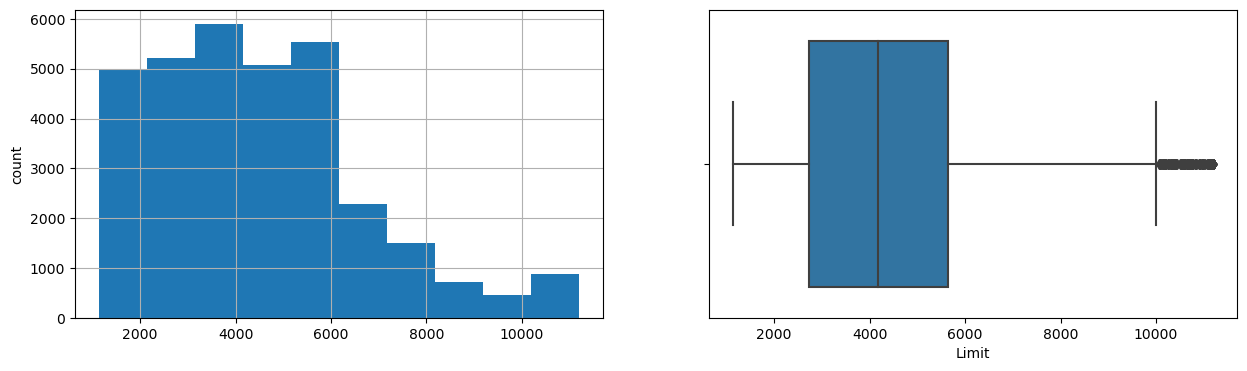

Rating
Skew : 0.64


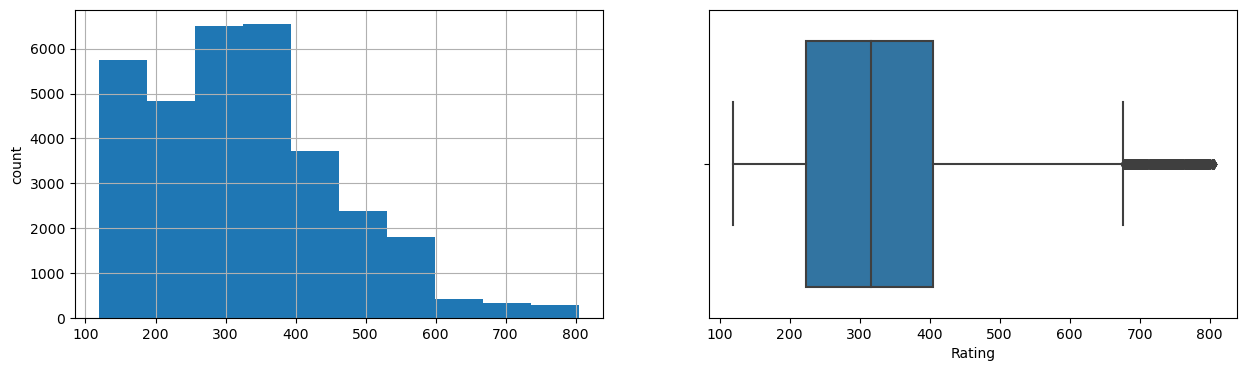

Cards
Skew : 0.58


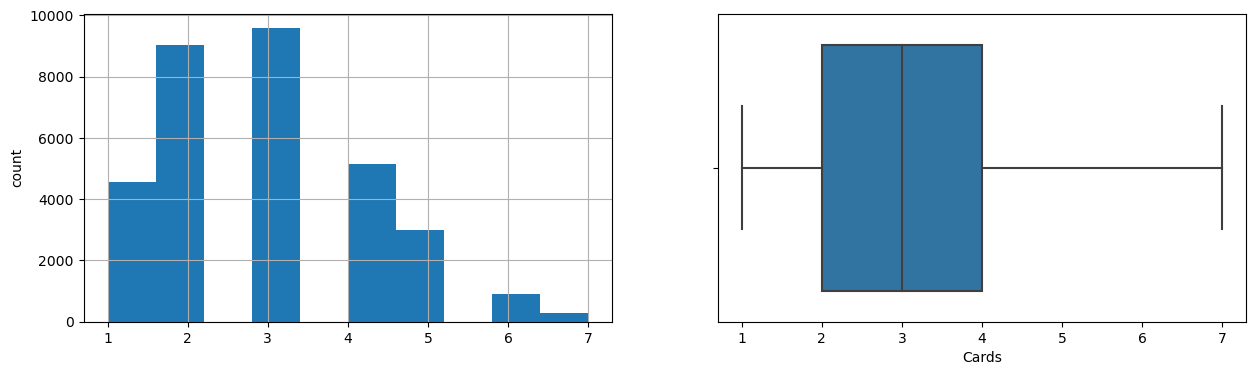

Balance
Skew : 0.9


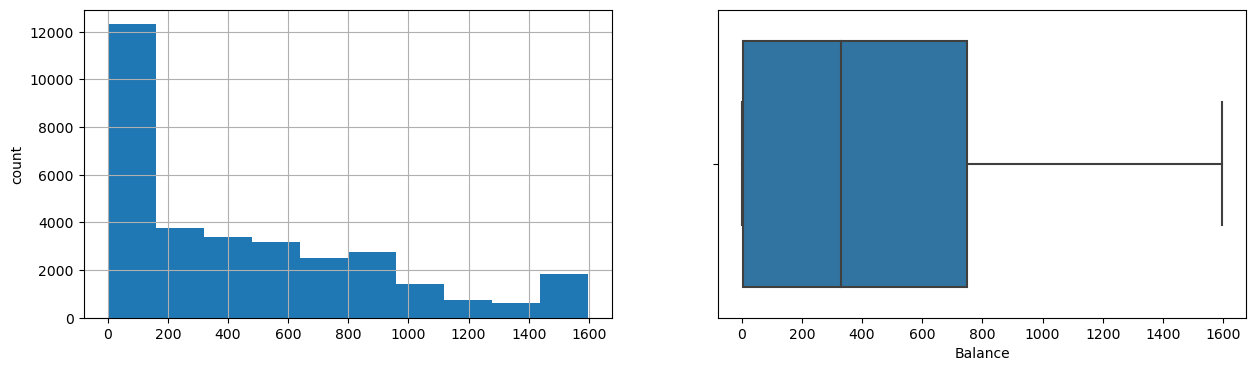

In [9]:
for col in num_data:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [25]:
round(data.agg(['skew', 'kurtosis']).transpose(),2)

,skew,kurtosis
Age,0.04,-1.05
Income,1.55,1.62
Limit,0.76,0.40
Rating,0.64,0.23
Cards,0.58,-0.02
Balance,0.90,-0.12


Above data shows that Income data is higly positive skewed. That does not seems to be swaying analysis and may rather help in analysing high income card holders.

### Performing correlation analysis to identify factors that are correlated with card limit.

In [32]:
# Find the pearson correlations matrix
corr = round(data.corr(method = 'pearson'),2)
corr

,Age,Income,Limit,Rating,Cards,Balance
Age,1.00,-0.01,-0.00,-0.00,0.00,0.01
Income,-0.01,1.00,0.26,0.24,0.02,0.18
Limit,-0.00,0.26,1.00,0.63,0.03,0.54
Rating,-0.00,0.24,0.63,1.00,0.04,0.60
Cards,0.00,0.02,0.03,0.04,1.00,0.04
Balance,0.01,0.18,0.54,0.60,0.04,1.00


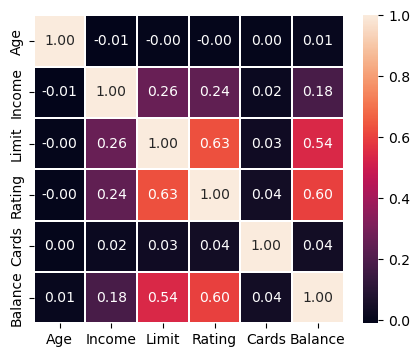

In [33]:
plt.figure(figsize=(5,4), dpi =100)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.2)
plt.show()

We can infer following findings:
<br>Credit rating and income are both positively correlated with card limit, meaning that customers with higher rating and incomes tend to have higher card limits.

In [46]:
# Create a target variable
data["defaulted"] = (data["Balance"] > data["Limit"])

#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data, data["defaulted"], test_size=0.25)

#Create a logistic regression model
model = linear_model.LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)

print(score)

ValueError: could not convert string to float: 'Verner'

### Relationship of Marital Status with Numerical data

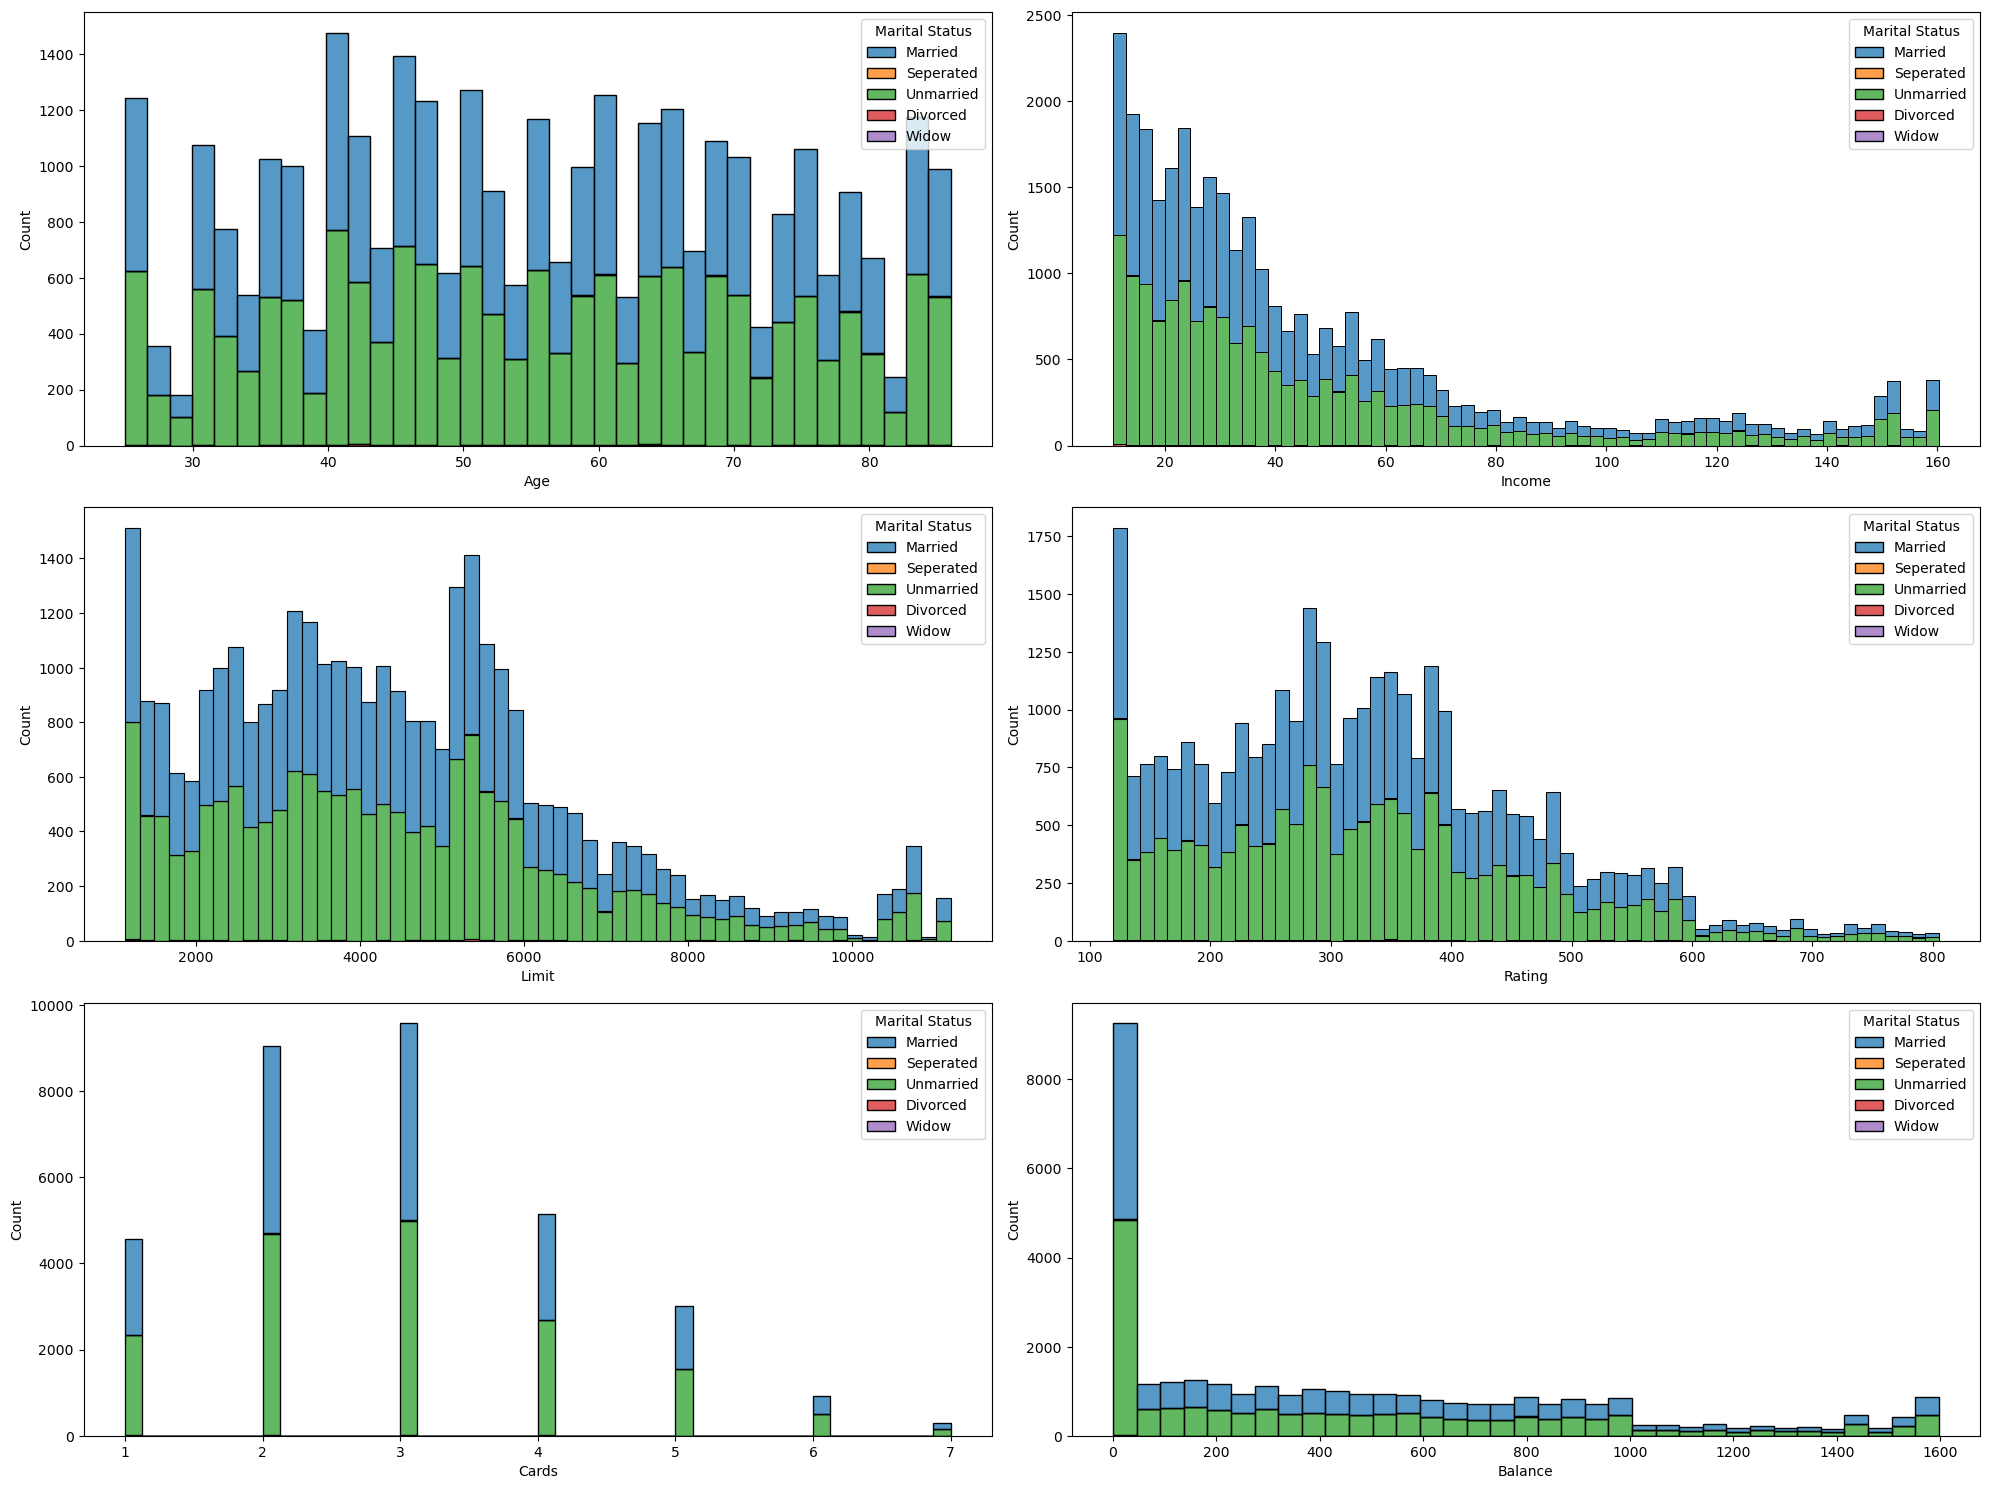

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], hue='Marital Status',multiple='stack')
    
fig.tight_layout()

In [12]:
data.groupby(['Marital Status'])[num_data].count()

,Age,Income,Limit,Rating,Cards,Balance
Marital Status,,,,,,
Divorced,51,51,51,51,51,51
Married,15621,15621,15621,15621,15621,15621
Seperated,37,37,37,37,37,37
Unmarried,16829,16829,16829,16829,16829,16829
Widow,9,9,9,9,9,9


We can infer following findings:
<br>Only married and unmarried are evident in the dataset. Seperated, Divorced and Widow are negligible in dataset.
<br>Mostly unmarried are max in all cardholder ages. 
<br>Unmarried are earning more than married and have more card limit.
<br>Rating-wise both married and unmarried are same.
<br>Maximum number of cards are held by unmarried.
<br>Most of card holders are using to the limit of the card. Unmarried are slightly higher than married in spending over cards.

### Relationship of Gender with Numerical data

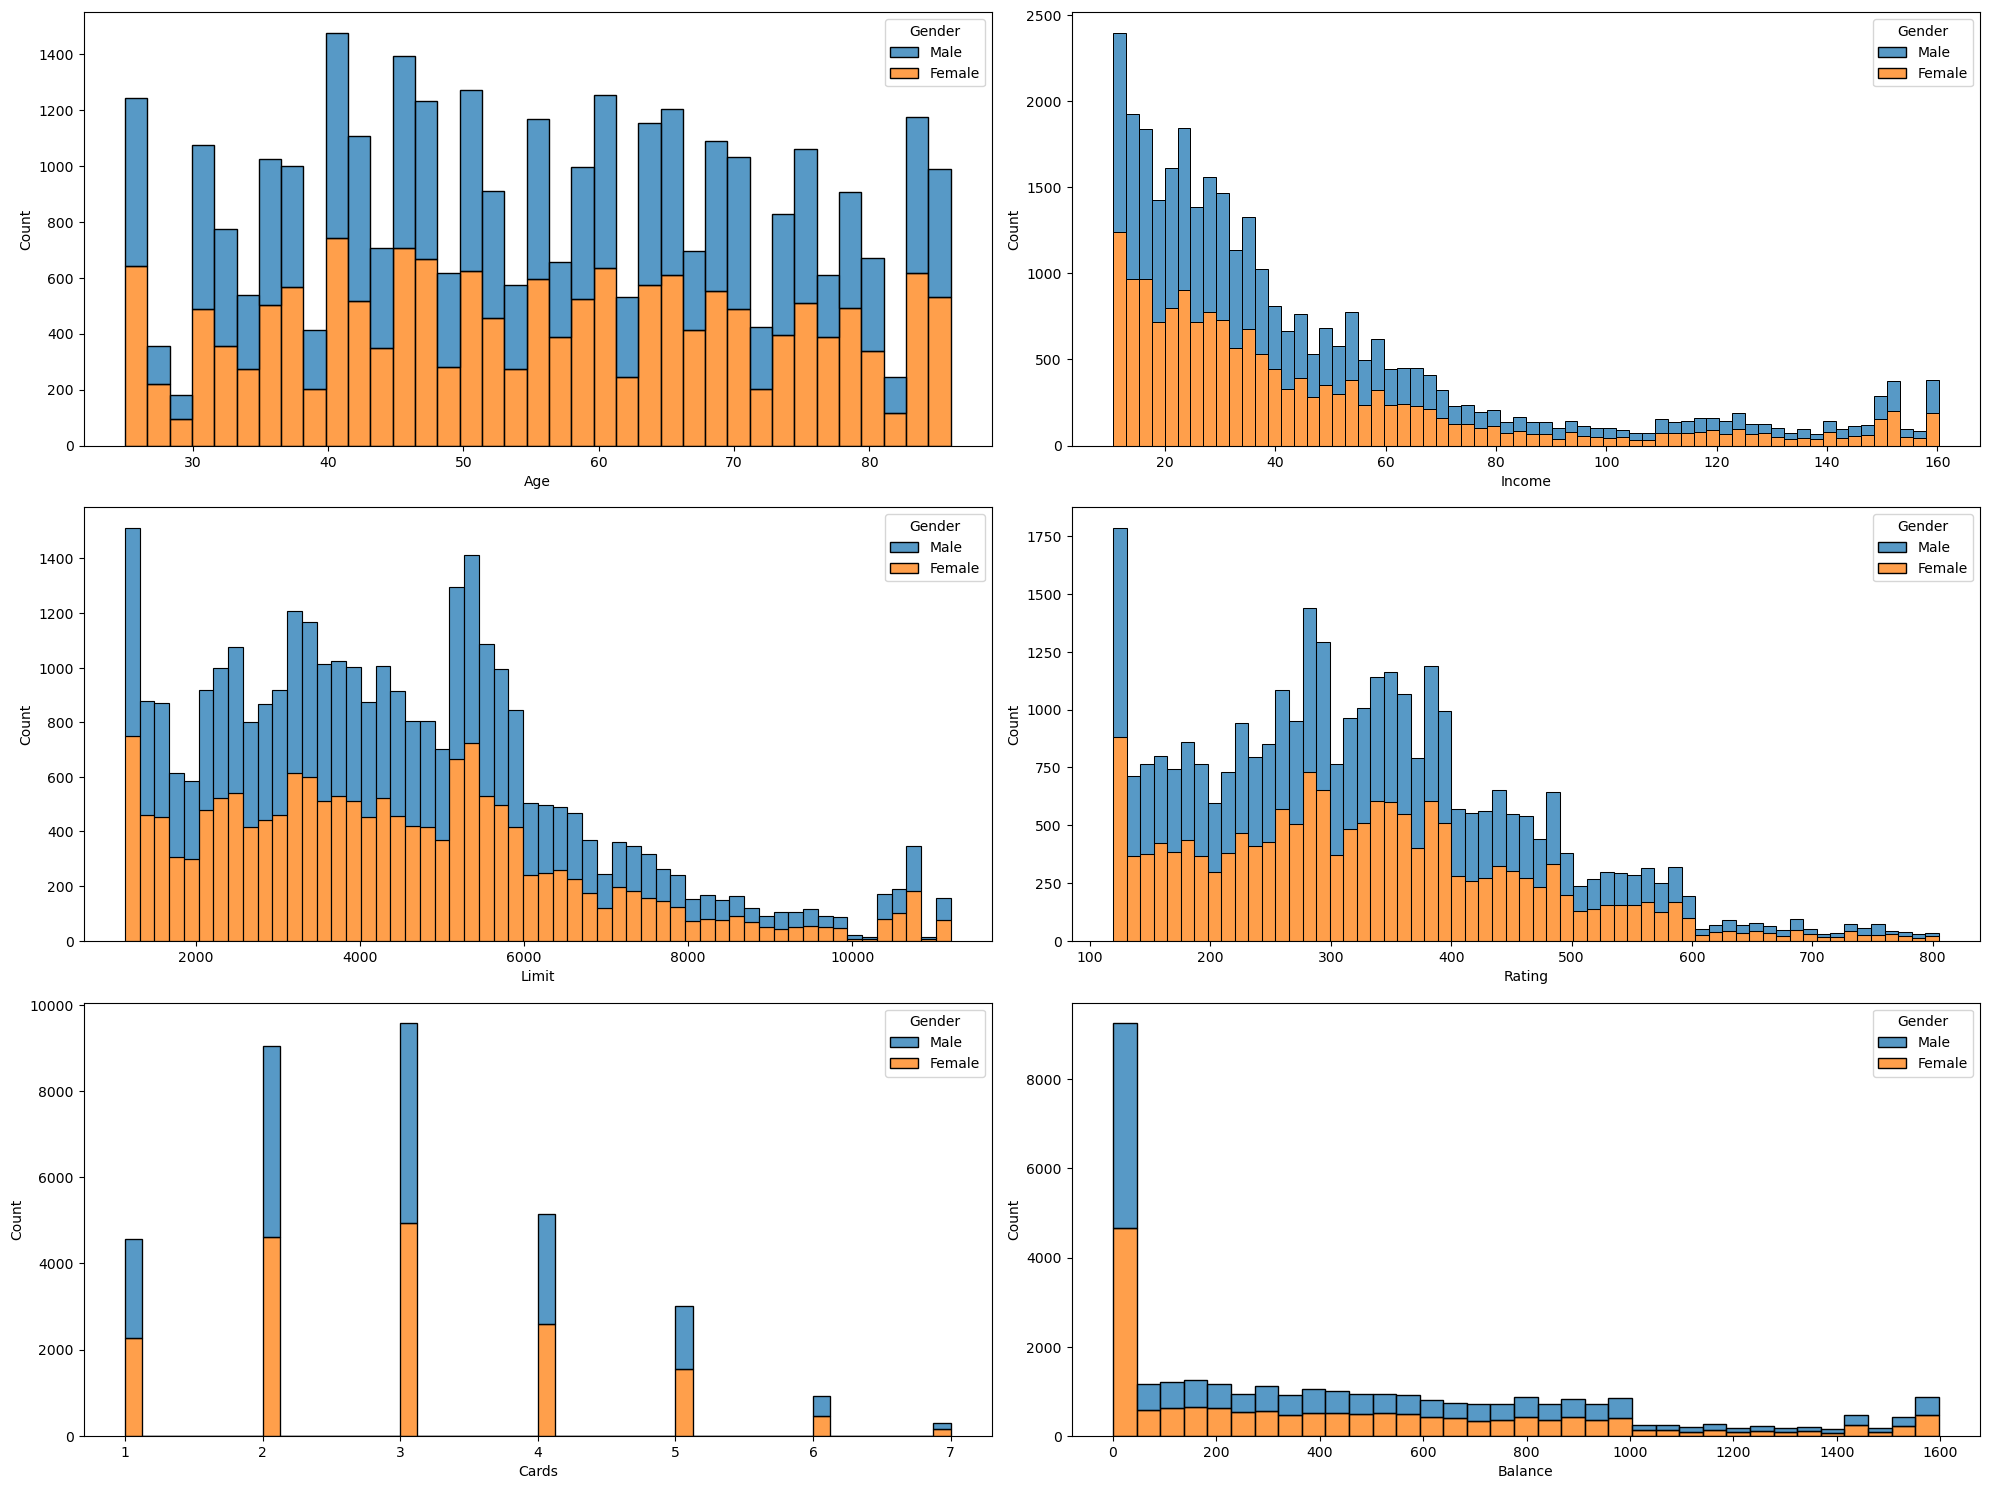

In [13]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], hue='Gender',multiple='stack')
    
fig.tight_layout()

In [29]:
data.groupby(['Gender'])[num_data].count()

,Age,Income,Limit,Rating,Cards,Balance
Gender,,,,,,
Female,16562,16562,16562,16562,16562,16562
Male,15985,15985,15985,15985,15985,15985


We can infer following findings:
<br>Female card holders are slightly higher compare to Male in the parameters..
<br>Maximum card holder whether its Male or Female are at lower income braket.
<br>Both male and female card holders are in lower to average Limits.
<br>Rating-wise both male and female are same.
<br>Maximum number of cards are held by female.
<br>Most of card holders are using to the limit of the card. female are slightly higher than male in spending over cards.

### Relationship of Ethnicity with Numerical data

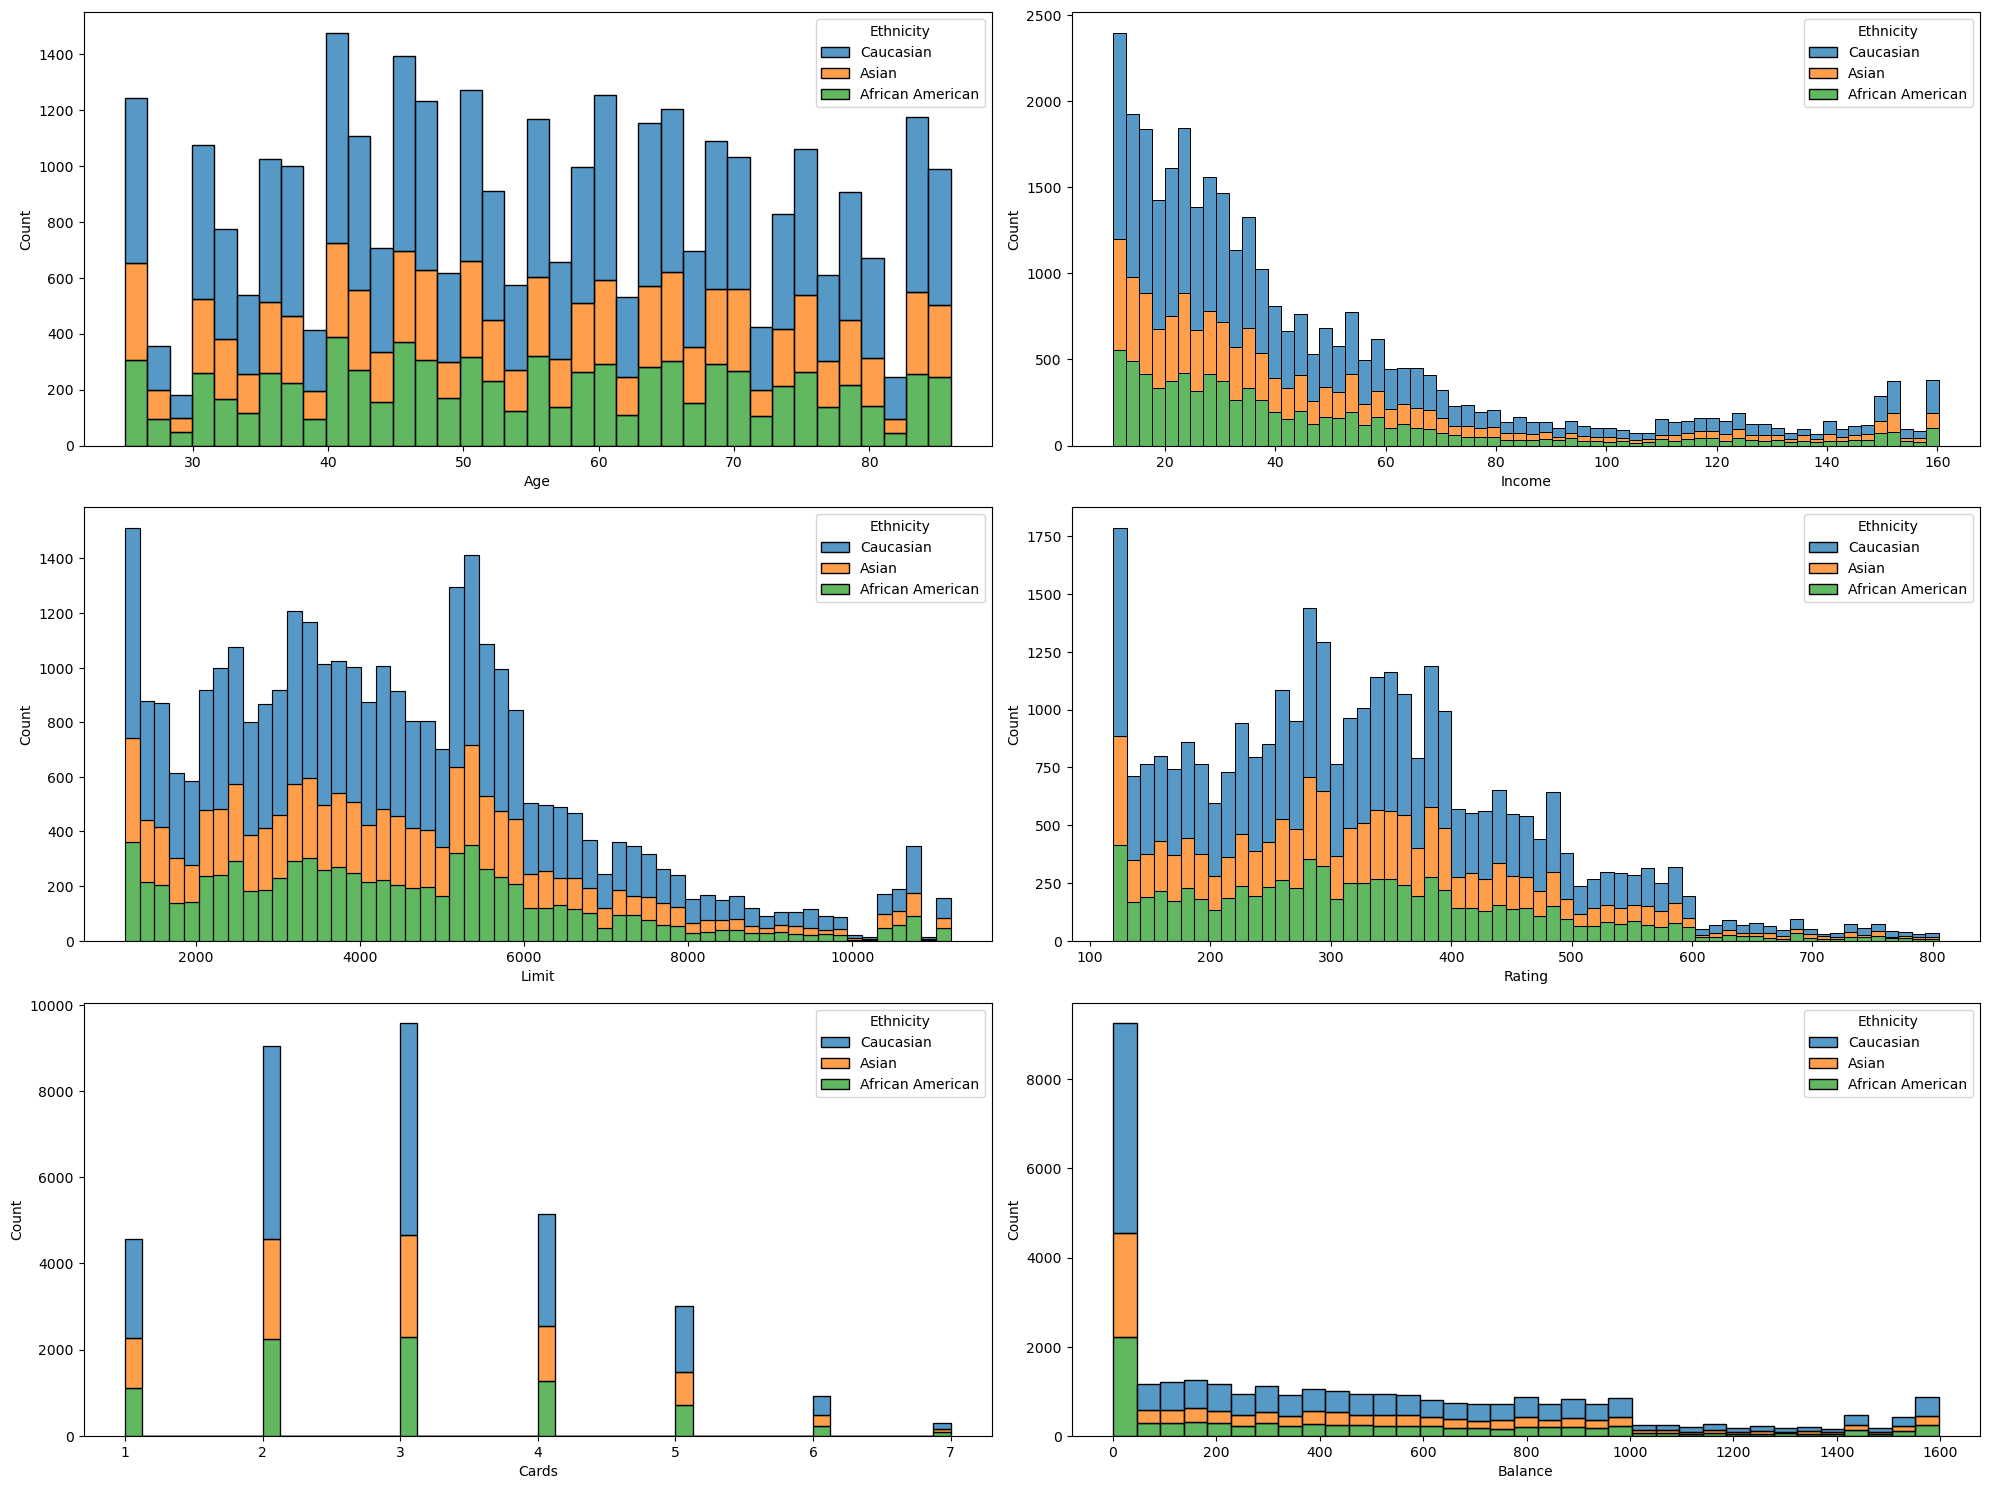

In [15]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], hue='Ethnicity',multiple='stack')
    
fig.tight_layout()

In [16]:
data.groupby(['Ethnicity'])[num_data].count()

,Age,Income,Limit,Rating,Cards,Balance
Ethnicity,,,,,,
African American,7927,7927,7927,7927,7927,7927
Asian,8240,8240,8240,8240,8240,8240
Caucasian,16380,16380,16380,16380,16380,16380


We can infer following findings:
<br>Maximum card holders are from Caucasian.
<br>Maximum card holders whether its Male or Female are at lower income braket.
<br>Both male and female card holders are in lower to average Limits.
<br>Rating-wise both male and female are same.
<br>Maximum number of cards are held by female.
<br>Most of card holders are using to the limit of the card. female are slightly higher than male in spending over cards.

### Relationship of Education with Numerical data

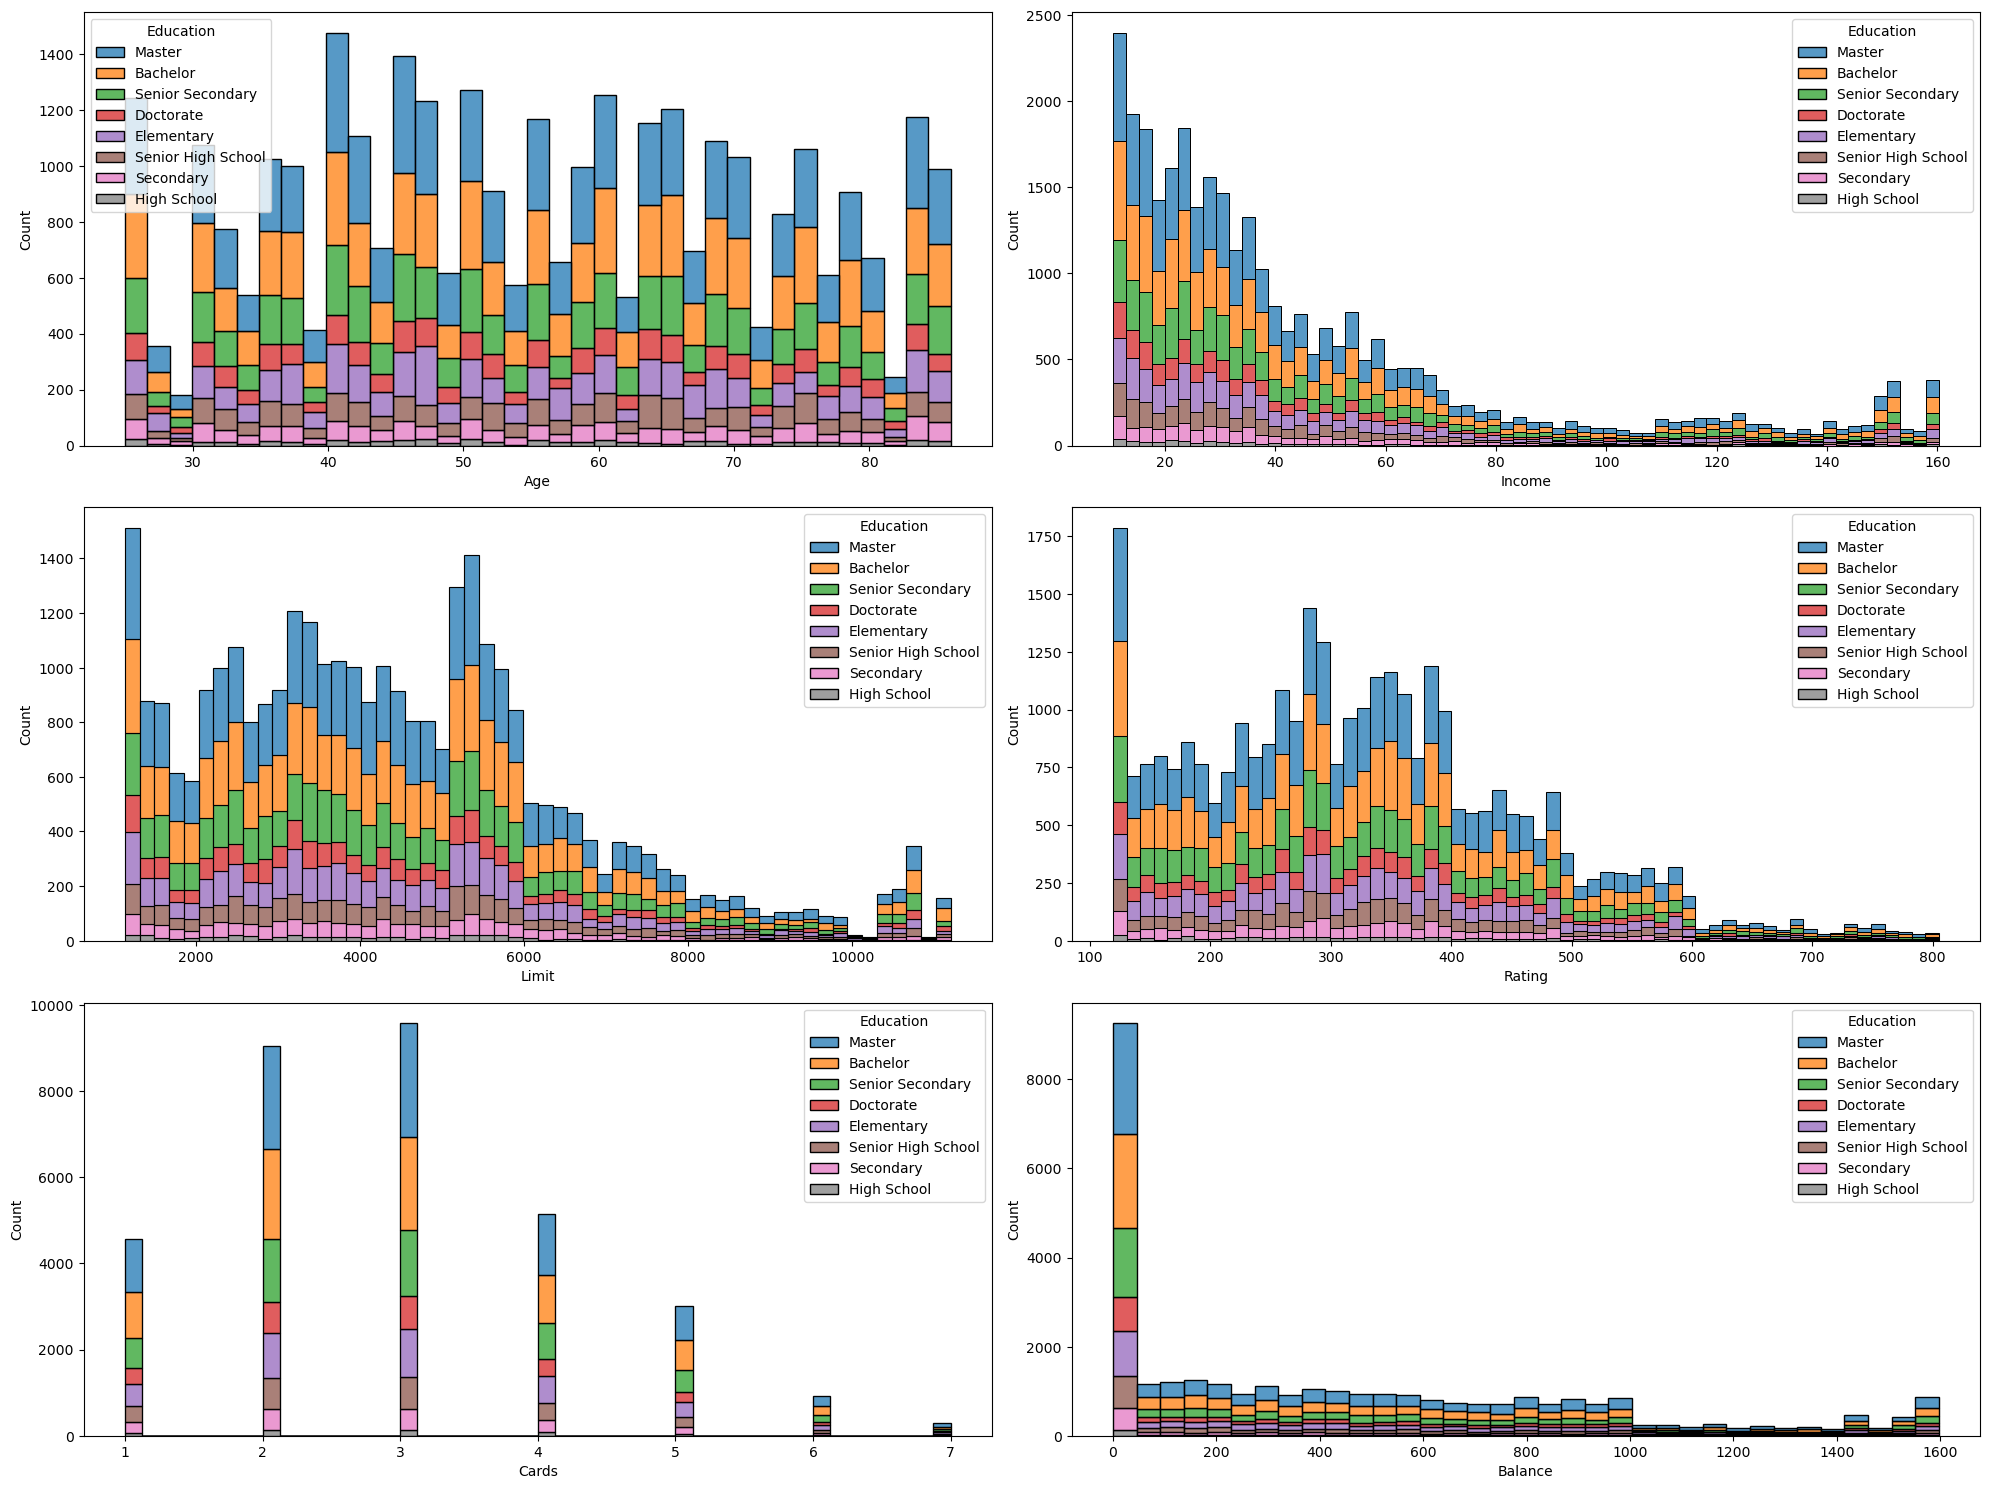

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], hue='Education',multiple='stack')
    
fig.tight_layout()

In [31]:
round(data.groupby(['Education'])[num_data].mean(),2)

,Age,Income,Limit,Rating,Cards,Balance
Education,,,,,,
Bachelor,55.80,46.39,4417.32,325.06,2.87,444.04
Doctorate,55.11,45.44,4373.73,322.43,2.90,436.51
Elementary,55.16,47.24,4439.21,329.75,2.93,455.34
High School,54.99,46.94,4450.93,338.41,2.92,464.59
Master,55.49,46.47,4405.74,327.28,2.91,451.53
Secondary,55.88,46.19,4464.88,328.77,2.89,460.87
Senior High School,55.66,45.99,4454.91,326.79,2.89,446.35
Senior Secondary,55.24,46.95,4419.24,326.31,2.94,442.50


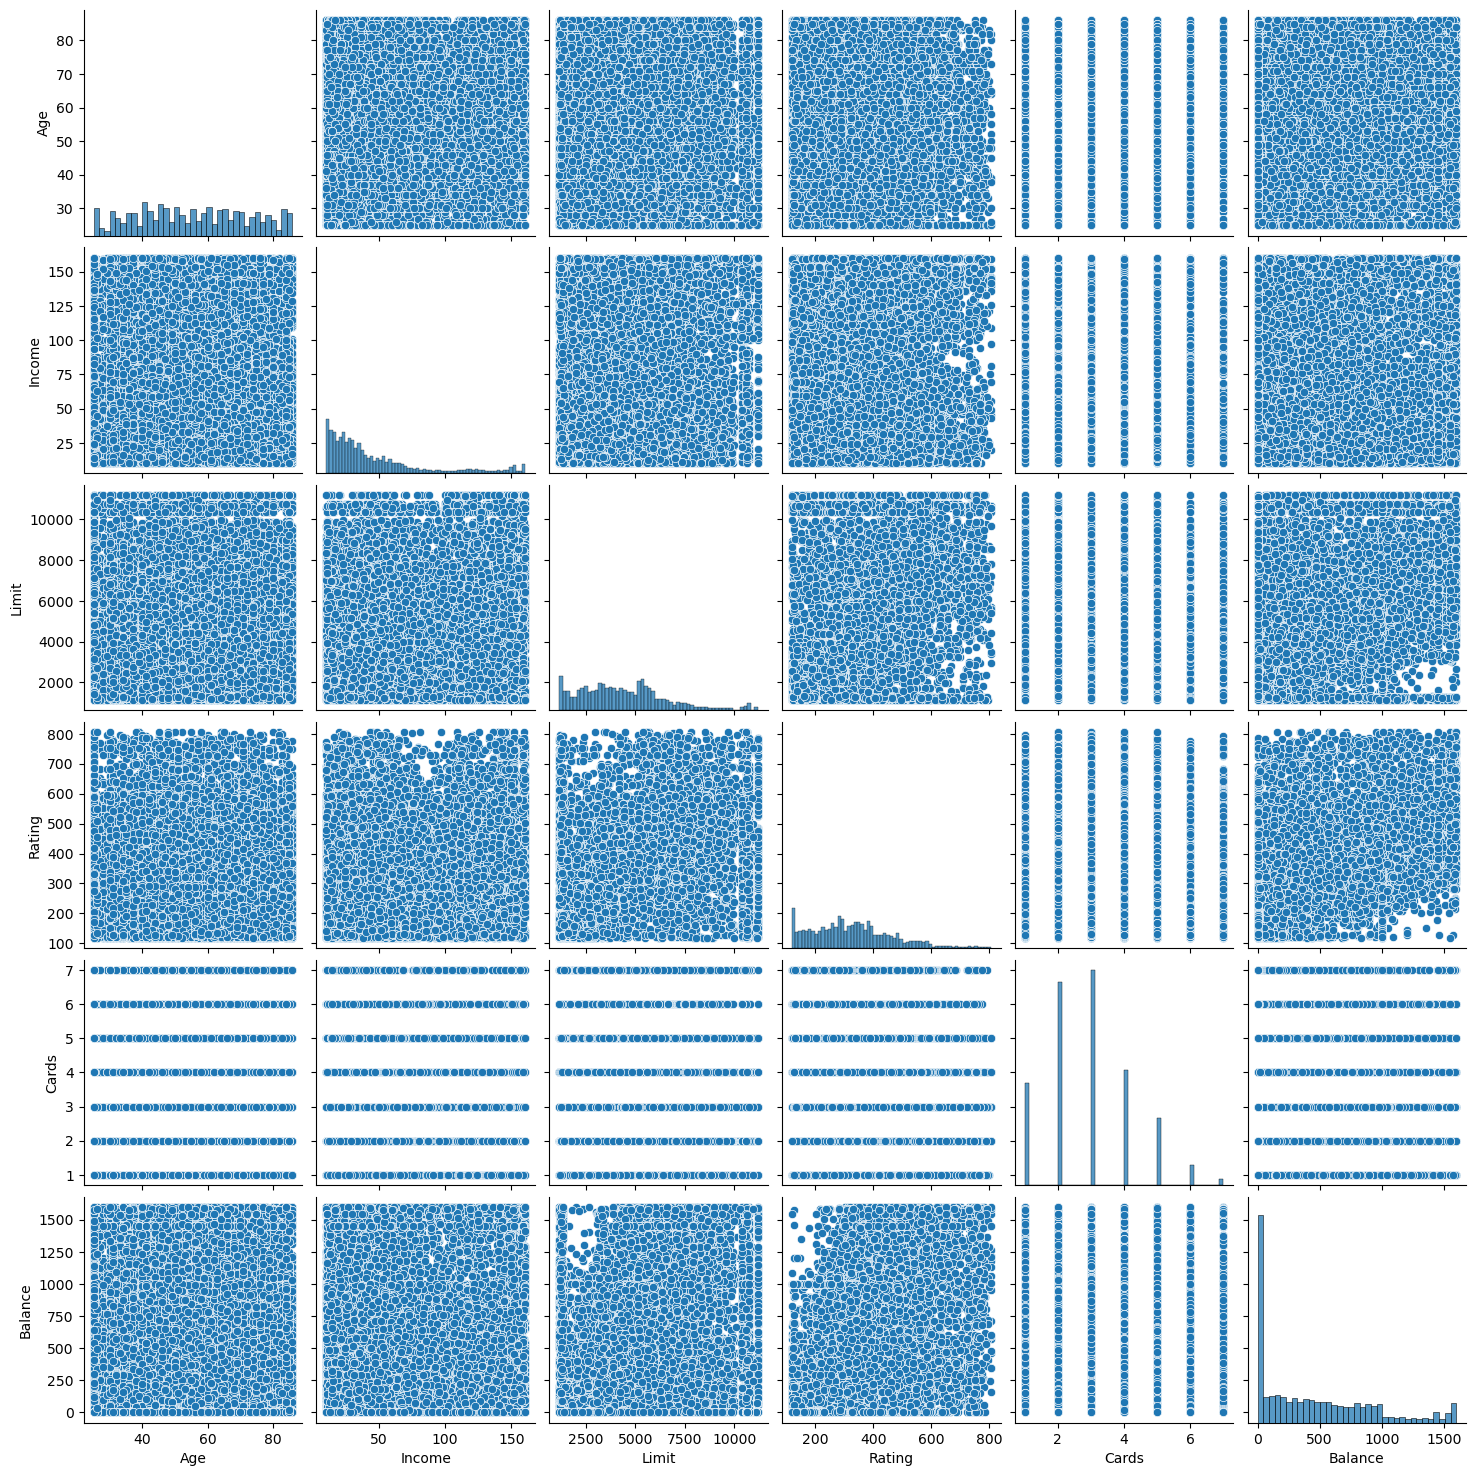

In [19]:
# Observe Bi-variate distributions

BiVarNum_Df = data[['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance']]
sns.pairplot(data = BiVarNum_Df)
plt.show()

<Axes: >

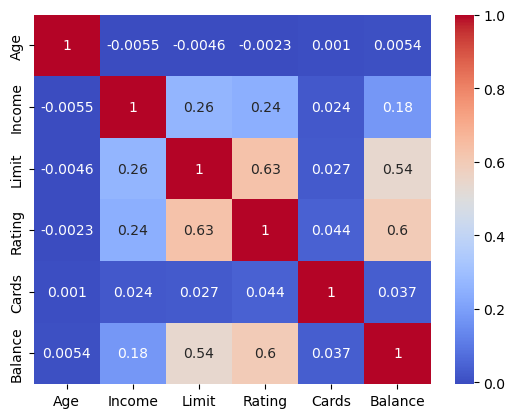

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [21]:
round(data.corr(),2)

,Age,Income,Limit,Rating,Cards,Balance
Age,1.00,-0.01,-0.00,-0.00,0.00,0.01
Income,-0.01,1.00,0.26,0.24,0.02,0.18
Limit,-0.00,0.26,1.00,0.63,0.03,0.54
Rating,-0.00,0.24,0.63,1.00,0.04,0.60
Cards,0.00,0.02,0.03,0.04,1.00,0.04
Balance,0.01,0.18,0.54,0.60,0.04,1.00


We can infer following finding:
<br>Age is negatively correlated with Income, Card Limit, Rating.
<br>Income is positively correlated with Card Limit, Rating and Balance.
<br>Card Limit is positively correlated with Rating and Balance.
<br>Rating is positively correlated with Card Balance.

### Creating bins for Income

In [22]:
# Creating bins for Income

minVal = data['Income'].min()
maxVal = data['Income'].max()
#bins = np.linspace(minVal,maxVal,5)
bins = [20,33,58,115,161]
slots = ['Low','Average','High','Very High']
data['Income Range'] = pd.cut(data['Income'],bins,labels = slots)

In [23]:
round(data.groupby('Income Range').count().T)

Income Range,Low,Average,High,Very High
Name,8383,8407,5174,2987
CustomerID,8383,8407,5174,2987
Age,8383,8407,5174,2987
Marital Status,8383,8407,5174,2987
Gender,8383,8407,5174,2987
Ethnicity,8383,8407,5174,2987
Education,8383,8407,5174,2987
Income,8383,8407,5174,2987
Limit,8383,8407,5174,2987
Rating,8383,8407,5174,2987


In [24]:
round(data.groupby('Income Range').describe().T)

Income Range       Low  Average     High  Very High
Age     count   8383.0   8407.0   5174.0     2987.0
        mean      55.0     56.0     56.0       55.0
        std       17.0     17.0     17.0       17.0
        min       25.0     25.0     25.0       25.0
        25%       41.0     42.0     42.0       41.0
        50%       55.0     56.0     55.0       55.0
        75%       69.0     69.0     69.0       68.0
        max       86.0     86.0     86.0       86.0
Income  count   8383.0   8407.0   5174.0     2987.0
        mean      26.0     43.0     77.0      140.0
        std        4.0      7.0     16.0       14.0
        min       20.0     33.0     58.0      115.0
        25%       23.0     37.0     64.0      126.0
        50%       26.0     43.0     72.0      143.0
        75%       29.0     50.0     88.0      152.0
        max       33.0     58.0    115.0      160.0
Limit   count   8383.0   8407.0   5174.0     2987.0
        mean    4106.0   4464.0   4883.0     5789.0
        std     1863.0   2011.0   2321.0     3206.0
        min     1134.0   1134.0   1134.0     1134.0
        25%     2648.0   2941.0   3170.0     2934.0
        50%     3865.0   4390.0   4747.0     5537.0
        75%     5380.0   5638.0   6152.0     8515.0
        max    11200.0  11200.0  11200.0    11200.0
Rating  count   8383.0   8407.0   5174.0     2987.0
        mean     308.0    333.0    357.0      401.0
        std      120.0    130.0    140.0      174.0
        min      119.0    119.0    119.0      119.0
        25%      221.0    237.0    258.0      259.0
        50%      296.0    329.0    346.0      388.0
        75%      382.0    414.0    447.0      534.0
        max      800.0    805.0    805.0      805.0
Cards   count   8383.0   8407.0   5174.0     2987.0
        mean       3.0      3.0      3.0        3.0
        std        1.0      1.0      1.0        1.0
        min        1.0      1.0      1.0        1.0
        25%        2.0      2.0      2.0        2.0
        50%        3.0      3.0      3.0        3.0
        75%        4.0      4.0      4.0        4.0
        max        7.0      7.0      7.0        7.0
Balance count   8383.0   8407.0   5174.0     2987.0
        mean     397.0    448.0    517.0      642.0
        std      426.0    444.0    478.0      536.0
        min        0.0      0.0      0.0        0.0
        25%        0.0      9.0     60.0      130.0
        50%      263.0    345.0    421.0      552.0
        75%      664.0    738.0    840.0     1070.0
        max     1597.0   1597.0   1597.0     1597.0